<a href="https://colab.research.google.com/github/rgnemasters/Food_Sales_Prediction_Project/blob/main/Food_Predictions_Project_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ryan Masters


*   Project Part 3
*   2/3/2022

**Data Dictionary for this dataset**


|**Variable Name**|	**Description**|
| ----- | ----- |
|Item_Identifier|	Unique product ID|
|Item_Weight|	Weight of product|
|Item_Fat_Content|	Whether the product is low fat or regular|
|Item_Visibility|	The percentage of total display area of all products in a store allocated to the particular product|
|Item_Type|	The category to which the product belongs|
|Item_MRP|	Maximum Retail Price (list price) of the product|
|Outlet_Identifier|	Unique store ID|
|Outlet_Establishment_Year|	The year in which store was established|
|Outlet_Size|	The size of the store in terms of ground area covered|
|Outlet_Location_Type|	The type of area in which the store is located|
|Outlet_Type|	Whether the outlet is a grocery store or some sort of supermarket|
|Item_Outlet_Sales|	Sales of the product in the particular store. This is the target variable to be predicted.|



##Mount Drive and Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Clean Data of Null Values and Inconsistencies

In [ ]:
#Identify number and location of null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#determine total number of rows and columns
df.shape

(8523, 12)

In [ ]:
# determined data types to check for numerical values stored as strings
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#check to find any correlations between null values in Outlet Size category
na_weight = df['Item_Weight'].isna() == True
na_size = df['Outlet_Size'].isna() == True
df.groupby(na_size)['Outlet_Location_Type'].value_counts()

Outlet_Size  Outlet_Location_Type
False        Tier 3                  2795
             Tier 1                  2388
             Tier 2                   930
True         Tier 2                  1855
             Tier 3                   555
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

In [ ]:
# Based on correlation of Tier 2 locations with Small sized markets, fill NaN's with "Small"
#Based on majority of Tier 3 locations in Medium sized locations, fill these NaN's with "Medium"
outlet_tier1 = df['Outlet_Location_Type'] == 'Tier 1'
outlet_tier2 = df['Outlet_Location_Type'] == 'Tier 2'
outlet_tier3 = df['Outlet_Location_Type'] == 'Tier 3'
df.loc[outlet_tier2 & na_size, 'Outlet_Size'] = 'Small'
df.loc[outlet_tier3 & na_size, 'Outlet_Size'] = 'Medium'
df.isna().sum()



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Review NaNs in 'Item_Weight' by using the describe() method, as this is a column of numeric values.
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df['Item_Weight'].mode()

0    12.15
dtype: float64

In [ ]:
#Based on 'Item Weight' mean, median, and mode approximating 12.5, fill these null values with 12.6 median
df['Item_Weight'] = df['Item_Weight'].fillna(12.6)
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [ ]:
#Replace inconsistent values to clean up data in 'Item_Fat_Content'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Reviewing and removing items with a visibility of "0", 
itemVis_null = df['Item_Visibility'] == 0
itemVis_null.sum()

526

In [ ]:
#Replacing 0 visibilities with .066132 mean
df.loc[itemVis_null, 'Item_Visibility'] = .066132
df['Item_Visibility'].min()

0.003574698

##Plotting Analyses


#Heatmap to review correlations between numeric values

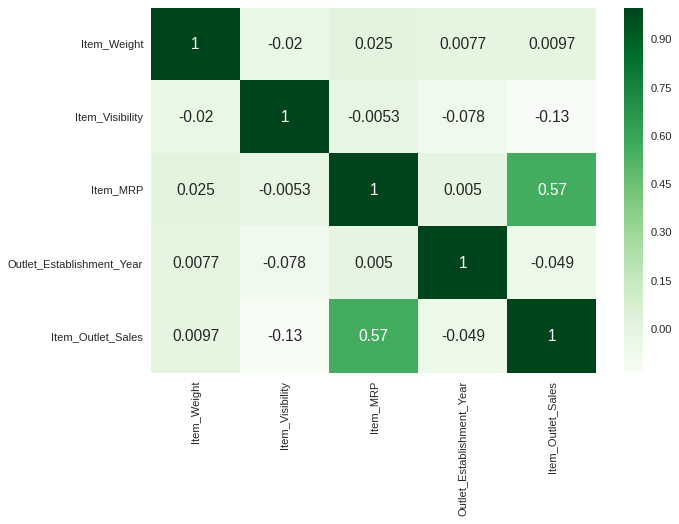

In [ ]:
plt.style.use('seaborn')
corr = df.corr()
sns.heatmap(corr, cmap = "Greens", annot = True)


No correlations above a .57 or below -.13. Moderate (.57) correlation rating between Item_MRP and Item_Outlet_Sales could be incidental (normal assumption would be that there is a negative correlation between these values), but **will review.**

Also: why such a weak negative correlation between Item Visibility and Sales? 

#Review of possible correlation of unit sales and Outlet Location Types. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Item Tiers')

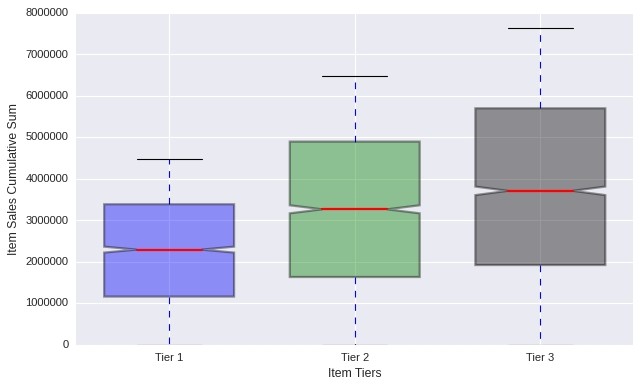

In [ ]:
tier1_sales = df.loc[outlet_tier1, 'Item_Outlet_Sales'].cumsum()
tier2_sales = df.loc[outlet_tier2, 'Item_Outlet_Sales'].cumsum()
tier3_sales = df.loc[outlet_tier3, 'Item_Outlet_Sales'].cumsum()

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5));
boxplots = axes.boxplot([tier1_sales, tier2_sales, tier3_sales], 
                        labels = ["Tier 1", "Tier 2", "Tier 3"], 
                        widths = .7,
                        patch_artist = True,
                        notch = True,
                        medianprops = dict(linestyle='-', linewidth=2),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', alpha = .4))                      
boxplot1 = boxplots['boxes'][0]
boxplot2 = boxplots['boxes'][1]
boxplot3 = boxplots['boxes'][2]
boxplot1.set_facecolor('blue')
boxplot2.set_facecolor('green')
boxplot3.set_facecolor('black')

plt.ylabel('Item Sales Cumulative Sum')
plt.xlabel("Item Tiers")

This boxplot comparing the cumulative sums of items as they appear in each store tier show a wider IQR in the higher tiers. Furthermore, the median is much higher in Tier 3, suggesting a strong correlation between the store's location and the sales of items.

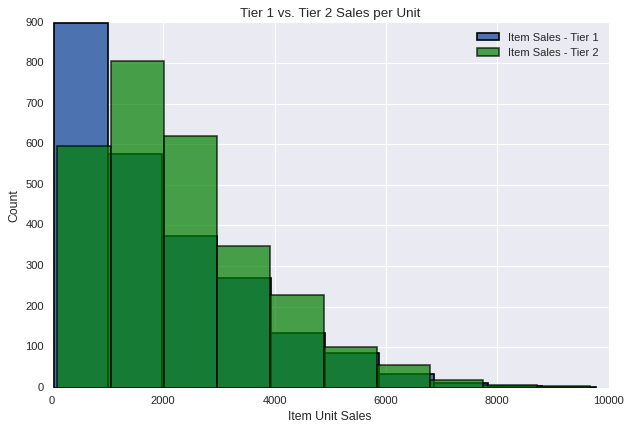

In [ ]:
sales_hist_tier1 = df[outlet_tier1]['Item_Outlet_Sales'].hist(linewidth = 1.5, edgecolor = "black", label = "Item Sales - Tier 1")
sales_hist_tier2 = df[outlet_tier2]['Item_Outlet_Sales'].hist(linewidth = 1.5, edgecolor = "black", label = "Item Sales - Tier 2",
                                                              facecolor = 'green', alpha = .7)
sales_hist_tier1.set_xlabel('Item Unit Sales')
sales_hist_tier1.set_ylabel('Count')
sales_hist_tier1.set_title('Tier 1 vs. Tier 2 Sales per Unit')
sales_hist_tier1.legend()

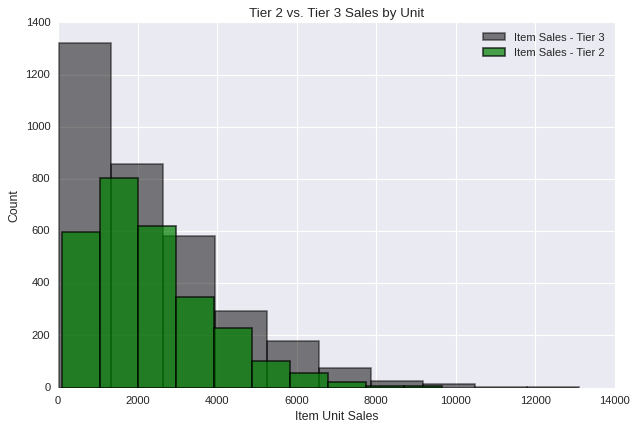

In [ ]:
sales_hist_tier3 = df[outlet_tier3]['Item_Outlet_Sales'].hist(linewidth = 1.5, edgecolor = "black", label = "Item Sales - Tier 3",
                                                              facecolor = 'black', alpha = .5)
sales_hist_tier2 = df[outlet_tier2]['Item_Outlet_Sales'].hist(linewidth = 1.5, facecolor = "green", edgecolor="black", label = "Item Sales - Tier 2",
                                                              alpha = .7)
sales_hist_tier3.set_xlabel('Item Unit Sales')
sales_hist_tier3.set_ylabel('Count')
sales_hist_tier3.set_title('Tier 2 vs. Tier 3 Sales by Unit')
sales_hist_tier3.legend()

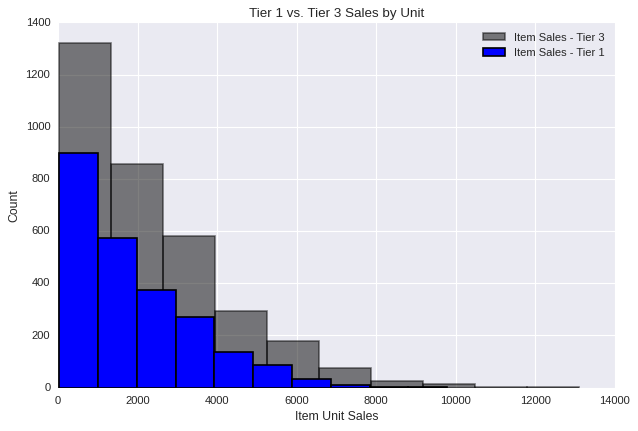

In [ ]:
sales_hist_tier3 = df[outlet_tier3]['Item_Outlet_Sales'].hist(linewidth = 1.5, edgecolor = "black", label = "Item Sales - Tier 3",
                                                              facecolor = 'black', alpha = .5)
sales_hist_tier1 = df[outlet_tier1]['Item_Outlet_Sales'].hist(linewidth = 1.5, facecolor = "blue", edgecolor="black", label = "Item Sales - Tier 1")
sales_hist_tier3.set_xlabel('Item Unit Sales')
sales_hist_tier3.set_ylabel('Count')
sales_hist_tier3.set_title('Tier 1 vs. Tier 3 Sales by Unit')
sales_hist_tier3.legend()


Clearly there is a strong connection between number of units (and thus, Item Outlet Sales) that move out of the stores and the location of each store. But this difference seems more meaningful for items located in Tier 3 locations.

Some of this correlation will be attributable to size differences in each class. Tier 3 has a higher concentration of Medium and High sizes. 

#Review of Possible Correlation Between Item Visibility and Sales Categories

0.07021338886342848

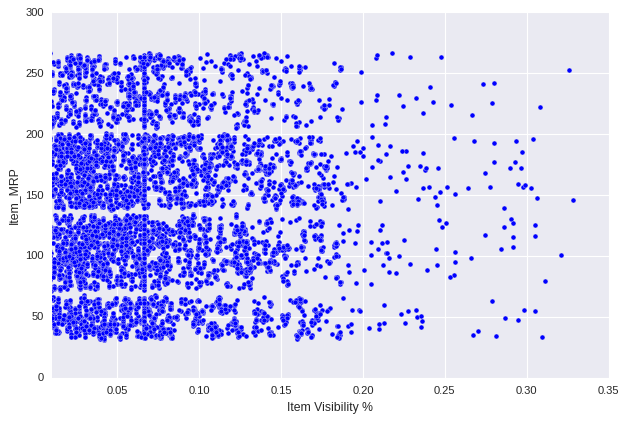

In [ ]:
plt.style.use('seaborn')
plt.scatter(df['Item_Visibility'], df['Item_MRP'])
plt.xlabel('Item Visibility %')
plt.ylabel('Item_MRP')
plt.xlim(left = .01)
df['Item_Visibility'].mean()

One insight from this scatter plot: giant clusters in the 5-10% visibility indicating the typical visibility strategy (mean of 6.6%). # of items isn't affected until the 200-250 range. Is there a connection between:

*   Outlet Size and Visibility
*   Visibility and Item Sales?

(0.01, 0.3)

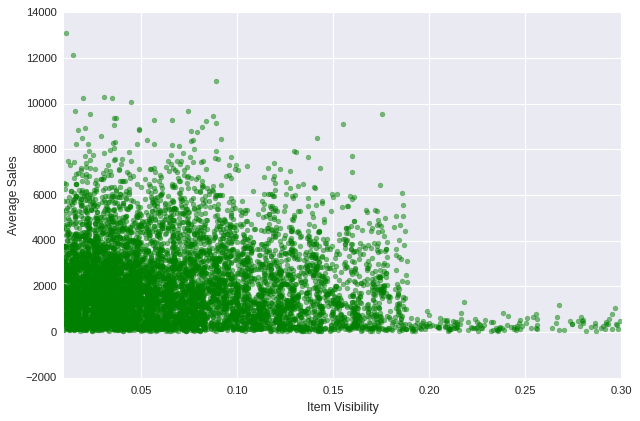

In [ ]:
visibility_filter2 = df['Item_Visibility'] > 0 
sales_mean = df[visibility_filter2].groupby(['Item_Visibility'])['Item_Outlet_Sales'].mean()
item_vis = sales_mean.index
sales_mean_values = sales_mean.values
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.scatter(item_vis, sales_mean_values, color = 'green', alpha = .5);
axes.set_xlabel('Item Visibility')
axes.set_ylabel('Average Sales')
axes.set_xlim(left=.01, right = .3)


This scatter plot indicates that Item Visibility can stay within the 10% or lower range without much affecting sales.  